<a href="https://colab.research.google.com/github/SouzaaCarol/Estudos-Python/blob/main/An%C3%A1lise_Preditiva_de_Dados_com_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.rcParams ['figure.figsize'] = (12, 7)

print("Bibliotecas Importadas com Sucesso!")

# Carregando o DataSet do Titanic

df = sns.load_dataset('titanic')

print("DataSet do Titanic Carregado!")

print(f"Nossa lista de passageiros contém {df.shape[0]} registros e {df.shape[1]} informações sobre cada um.")

df.head()


Bibliotecas Importadas com Sucesso!
DataSet do Titanic Carregado!
Nossa lista de passageiros contém 891 registros e 15 informações sobre cada um.


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
fig = px.pie(df, names='survived', title = 'Distribuição dos Sobreviventes no Titanic',
             labels={0: 'Não Sobreviveu', 1:'Sobreviveu'},
             color_discrete_sequence=px.colors.sequential.Agsunset)

fig.update_traces(textinfo='percent+label', pull=[0, 0.1])
fig.show()

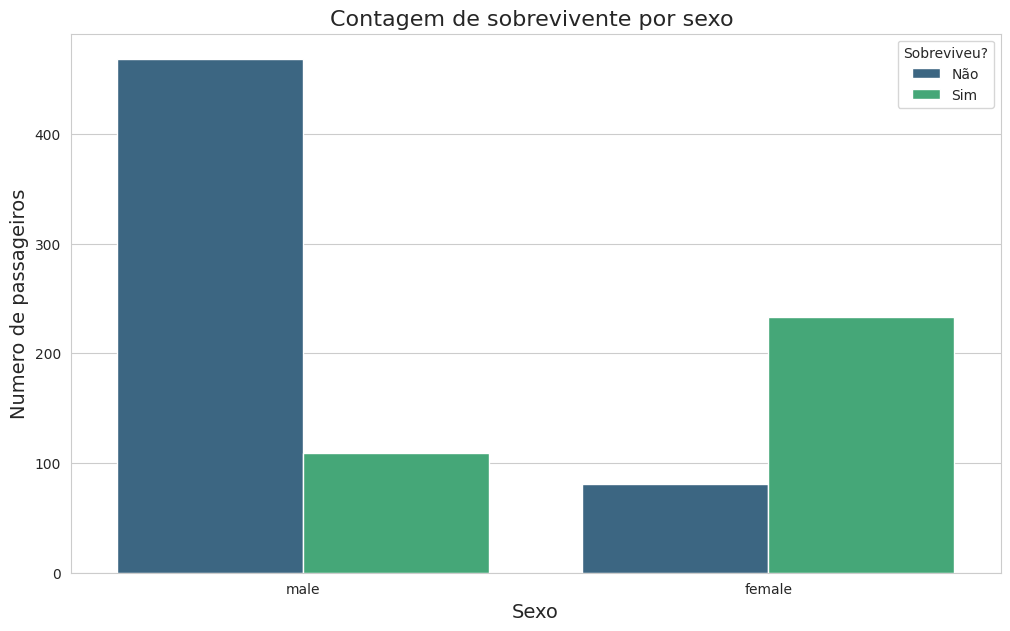

In [2]:
sns.countplot(x='sex', hue='survived', data=df, palette='viridis')
plt.title('Contagem de sobrevivente por sexo ', fontsize= 16)
plt.xlabel('Sexo', fontsize= 14)
plt.ylabel('Numero de passageiros', fontsize= 14)
plt.legend(title = 'Sobreviveu?', labels = ['Não', 'Sim'])
plt.show()

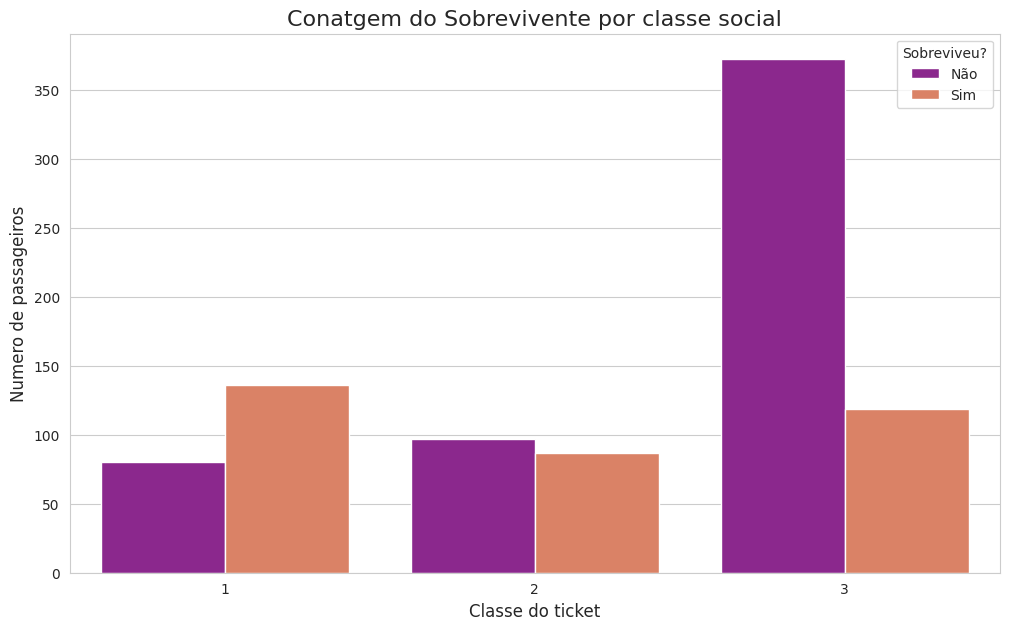

In [3]:
sns.countplot(x='pclass', hue= 'survived', data=df, palette='plasma')
plt.title('Conatgem do Sobrevivente por classe social', fontsize=16)
plt.xlabel('Classe do ticket', fontsize=12)
plt.ylabel('Numero de passageiros', fontsize=12)
plt.legend(title='Sobreviveu?', labels=['Não', 'Sim'])
plt.show()

In [4]:
import pandas as pd
import seaborn as sns

#recarregar os dados
df_original = sns.load_dataset('titanic')
df = df_original.copy()

#Engenharia de atributos
df['family_size'] = df['sibsp'] + df['parch'] + 1

df['is_alone']= (df['family_size'] == 1).astype(int)

#removendo ruidos

df.drop(['alive', 'who','adult_male','class','alone', 'sibsp', 'parch', 'deck'], axis=1, inplace=True)

print("Preparação minima concluido.Dados  prontos para pipeline ")
df.head()

Preparação minima concluido.Dados  prontos para pipeline 


,survived,pclass,sex,age,fare,embarked,embark_town,family_size,is_alone
0,0,3,male,22.0,7.2500,S,Southampton,2,0
1,1,1,female,38.0,71.2833,C,Cherbourg,2,0
2,1,3,female,26.0,7.9250,S,Southampton,1,1
3,1,1,female,35.0,53.1000,S,Southampton,2,0
4,0,3,male,35.0,8.0500,S,Southampton,1,1


In [10]:
# Criando o Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Separar as Pistas (X) dos Resultados (y)

X = df.drop('survived', axis=1)
y = df['survived']

# Separando os Dados em Numéricos e Categóricos

numeric_features = ['age', 'fare', 'pclass', 'family_size', 'is_alone']
categorical_features = ['sex', 'embark_town']

# Criando a Esteira dos Dados Numéricos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

